In [1]:
import sys
sys.path.append('/MS3D')
import pickle
from pathlib import Path
from pcdet.utils.transform_utils import ego_to_world, world_to_ego
import numpy as np
np.set_printoptions(precision=4, suppress=True)
from pcdet.utils import generate_ps_utils
from visualize_bev import plot_boxes 
from pcdet.utils.tracker_utils import get_frame_track_boxes
from pcdet.utils import compatibility_utils as compat
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.utils import common_utils
from pcdet.datasets import build_dataloader
import matplotlib.pyplot as plt
from visual_utils.common_vis import  mask_points_by_range

def load_pkl(pth):
    with open(pth, 'rb') as f:
        pkl_file = pickle.load(f)
    return pkl_file

def plot_pointcloud(pts, limit_range, size=0.5, c='black'):
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)    
    mask = mask_points_by_range(pts, limit_range)
    ax.scatter(pts[mask][:,0],pts[mask][:,1],s=size, c=c, marker='o')
    return plt, ax

# Get target dataset
cfg_file = '/MS3D/tools/cfgs/target_waymo/ms3d_nuscenes_voxel_rcnn_centerhead.yaml'
cfg_from_yaml_file(cfg_file, cfg)
logger = common_utils.create_logger('temp.txt', rank=cfg.LOCAL_RANK)
if cfg.get('DATA_CONFIG_TAR', False):
    dataset_cfg = cfg.DATA_CONFIG_TAR
    classes = cfg.DATA_CONFIG_TAR.CLASS_NAMES
    cfg.DATA_CONFIG_TAR.USE_PSEUDO_LABEL=False
    if dataset_cfg.get('USE_TTA', False):
        dataset_cfg.USE_TTA=False
else:
    dataset_cfg = cfg.DATA_CONFIG
    classes = cfg.CLASS_NAMES
dataset_cfg.DATA_SPLIT.test = 'train'
dataset_cfg.USE_CUSTOM_TRAIN_SCENES = True
dataset_cfg.SAMPLED_INTERVAL.test = 2
logger = common_utils.create_logger('temp.txt', rank=cfg.LOCAL_RANK)
target_set, target_loader, sampler = build_dataloader(
            dataset_cfg=dataset_cfg,
            class_names=cfg.DATA_CONFIG_TAR.CLASS_NAMES,
            batch_size=1, logger=logger, training=False, dist=False, workers=1
        )
idx_to_frameid = {v: k for k, v in target_set.frameid_to_idx.items()}

fatal: unsafe repository ('/MS3D' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /MS3D


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2023-05-15 23:34:27,466   INFO  Loading Waymo dataset
2023-05-15 23:34:27,466   INFO  Loading Waymo dataset
2023-05-15 23:34:29,961   INFO  Total skipped info 0
2023-05-15 23:34:29,961   INFO  Total skipped info 0
2023-05-15 23:34:29,962   INFO  Total samples for Waymo dataset: 37680
2023-05-15 23:34:29,962   INFO  Total samples for Waymo dataset: 37680
2023-05-15 23:34:29,977   INFO  Total sampled samples for Waymo dataset: 18840
2023-05-15 23:34:29,977   INFO  Total sampled samples for Waymo dataset: 18840


In [1]:
from pcdet.utils import box_fusion_utils
from tqdm import tqdm 
import numpy as np

dets_txt = '/MS3D/tools/cfgs/target_waymo/kbf_combinations/vox_a-c.txt'
print(f'classes: {cfg.DATA_CONFIG_TAR.CLASS_NAMES}')

ps_dict = {}
det_annos = box_fusion_utils.load_src_paths_txt(dets_txt)
print('Number of detectors: ', len(det_annos))
combined_dets = box_fusion_utils.combine_box_pkls(det_annos, cfg.DATA_CONFIG_TAR.CLASS_NAMES)

cdets_frameid_to_idx = {}
for idx, cdet in enumerate(combined_dets):
    cdets_frameid_to_idx[cdet['frame_id']] = idx

ModuleNotFoundError: No module named 'pcdet'

In [6]:
# Find frames with the most cyclists and pedestrians
num_cycs = {}
num_peds = {}
for enum, info in enumerate(target_set.infos):
    num_cyc = np.count_nonzero(info['annos']['name'] == 'Cyclist')
    num_ped = np.count_nonzero(info['annos']['name'] == 'Pedestrian')
    seq_name = '_'.join(info['frame_id'].split('_')[:-1])
    if seq_name not in num_cycs.keys():
        num_cycs[seq_name] = 0
    if seq_name not in num_peds.keys():
        num_peds[seq_name] = 0
    
    num_cycs[seq_name] += num_cyc
    num_peds[seq_name] += num_ped  
sorted_num_peds = {k: v for k, v in sorted(num_peds.items(), key=lambda item: item[1], reverse=True)}
sorted_num_cycs = {k: v for k, v in sorted(num_cycs.items(), key=lambda item: item[1], reverse=True)}

In [2]:
combined_dets = load_pkl('/MS3D/tools/cfgs/target_waymo/kbf_combinations/vox_a-c_combined_dets.pkl')
ps_dict = load_pkl('/MS3D/tools/cfgs/target_waymo/kbf_combinations/kbf_multiclass_exp1_confscaling.pkl')

In [52]:
ps_dict = load_pkl('/MS3D/tools/cfgs/target_waymo/kbf_combinations/kbf_multiclass_exp1.pkl')

In [7]:
sorted_num_cycs

{'segment-17552108427312284959_3200_000_3220_000_with_camera_labels': 806,
 'segment-16977844994272847523_2140_000_2160_000_with_camera_labels': 708,
 'segment-16034875274658204340_240_000_260_000_with_camera_labels': 404,
 'segment-11318901554551149504_520_000_540_000_with_camera_labels': 298,
 'segment-16951470340360921766_2840_000_2860_000_with_camera_labels': 297,
 'segment-13078892192456386060_2960_000_2980_000_with_camera_labels': 229,
 'segment-15882343134097151256_4820_000_4840_000_with_camera_labels': 221,
 'segment-15448466074775525292_2920_000_2940_000_with_camera_labels': 189,
 'segment-15844593126368860820_3260_000_3280_000_with_camera_labels': 177,
 'segment-10231929575853664160_1160_000_1180_000_with_camera_labels': 177,
 'segment-17993467596234560701_4940_000_4960_000_with_camera_labels': 169,
 'segment-16504318334867223853_480_000_500_000_with_camera_labels': 151,
 'segment-6229371035421550389_2220_000_2240_000_with_camera_labels': 142,
 'segment-15265053588821562107_6

In [53]:
for k,v in ps_dict.items():
    print(f'{k}: {len(v["gt_boxes"][v["gt_boxes"][:,8] > 0.3])}')

segment-12027892938363296829_4086_280_4106_280_with_camera_labels_000: 1
segment-12027892938363296829_4086_280_4106_280_with_camera_labels_040: 3
segment-12027892938363296829_4086_280_4106_280_with_camera_labels_080: 4
segment-12027892938363296829_4086_280_4106_280_with_camera_labels_120: 1
segment-12027892938363296829_4086_280_4106_280_with_camera_labels_160: 1
segment-4733704239941053266_960_000_980_000_with_camera_labels_002: 0
segment-4733704239941053266_960_000_980_000_with_camera_labels_042: 0
segment-4733704239941053266_960_000_980_000_with_camera_labels_082: 0
segment-4733704239941053266_960_000_980_000_with_camera_labels_122: 2
segment-4733704239941053266_960_000_980_000_with_camera_labels_162: 3
segment-13506499849906169066_120_000_140_000_with_camera_labels_004: 1
segment-13506499849906169066_120_000_140_000_with_camera_labels_044: 1
segment-13506499849906169066_120_000_140_000_with_camera_labels_084: 0
segment-13506499849906169066_120_000_140_000_with_camera_labels_124: 0
s

<IPython.core.display.Javascript object>


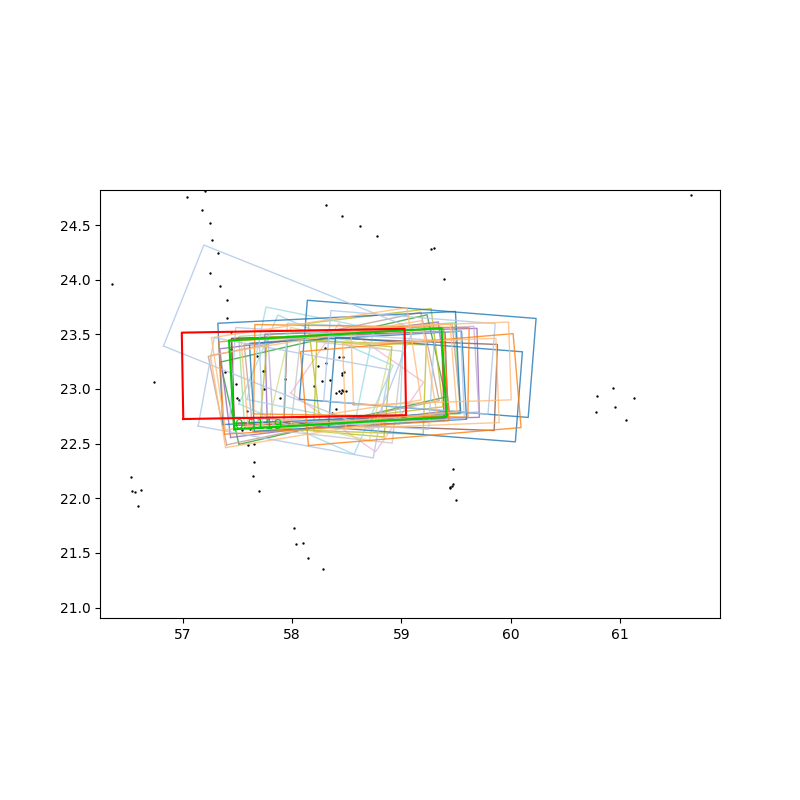

7647 segment-17552108427312284959_3200_000_3220_000_with_camera_labels_026
num cyclists:  11


In [128]:
%matplotlib notebook

idx=80
frame_id = compat.get_frame_id(target_set, target_set.infos[idx])
frame_id = 'segment-17552108427312284959_3200_000_3220_000_with_camera_labels_026'

pose = compat.get_pose(target_set, frame_id)
pts = compat.get_lidar(target_set, frame_id)
# pts, _ = ego_to_world(pose, points=pts)
pc_mean = np.mean(pts, axis=0)    
pc_range = 80
limit_range = [pc_mean[0]-pc_range, pc_mean[1]-pc_range, -5.0, pc_mean[0]+pc_range, pc_mean[1]+pc_range, 3.0]

plt, ax = plot_pointcloud(pts, limit_range, size=0.5, c=np.array([[0,0,0]]))
print(target_set.frameid_to_idx[frame_id], frame_id)

# ---- Plot boxes -----
cdets = combined_dets[target_set.frameid_to_idx[frame_id]]
src_th = 0.1
src_mask = cdets['score'] > src_th
plot_boxes(ax, cdets['boxes_lidar'][src_mask], 
           scores=None,
           source_id=cdets['source_id'][src_mask],
           source_labels=cdets['source'][src_mask],
           limit_range=limit_range, alpha=0.8)

ps = ps_dict[frame_id]['gt_boxes']
cls_mask = abs(ps[:,7]) == 4
ps = ps[cls_mask]
# _, ps = ego_to_world(pose, boxes=ps)
plot_boxes(ax, ps[ps[:,8] > 0.3], 
               scores=ps[:,8][ps[:,8] > 0.3],
               color=[0,0.8,0],linestyle='solid',linewidth=1.5,label='KBF',
               limit_range=limit_range, alpha=1)

ps = ps_dict[frame_id]['gt_boxes']
cls_mask = abs(ps[:,7]) == 6
ps = ps[cls_mask]
# _, ps = ego_to_world(pose, boxes=ps)
plot_boxes(ax, ps[ps[:,8] > 0.3], 
               scores=ps[:,8][ps[:,8] > 0.3],
               color=[0,0.8,0],linestyle='solid',linewidth=1.5,label='KBF',
               limit_range=limit_range, alpha=1)

# class_mask = np.array([n in target_set.class_names for n in compat.get_gt_names(target_set, frame_id)], 
#                       dtype=np.bool_)
gt_names = compat.get_gt_names(target_set, frame_id)
gt_boxes = compat.get_gt_boxes(target_set, frame_id)[gt_names == 'Cyclist']
print('num cyclists: ', len(gt_boxes))
plot_boxes(ax, gt_boxes,
               color=[1,0,0],label='Ground-truth',linewidth=1.5,
               limit_range=limit_range, alpha=1)

gt_names = compat.get_gt_names(target_set, frame_id)
gt_boxes = compat.get_gt_boxes(target_set, frame_id)[gt_names == 'Pedestrian']
plot_boxes(ax, gt_boxes,
               color=[1,0,1],label='Ground-truth',linewidth=1.5,
               limit_range=limit_range, alpha=1)

# ------- VISUALIZE
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

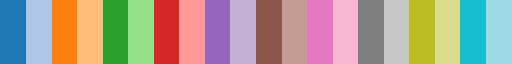

In [127]:
plt.get_cmap('tab20')

In [126]:
prev_id = -1
for idx, src in enumerate(combined_dets[0]['source_id']):
    cur_id = combined_dets[0]['source_id'][idx]
    label = combined_dets[0]['source'][idx]
    if cur_id != prev_id:
        print(f'{cur_id % 20}: {label}')
        prev_id = cur_id

0: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo1xyzt_custom190_notta
1: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo1xyzt_custom190_rwr
2: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo1xyzt_custom190_rwf
3: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo1xyzt_custom190_rwf_rwr
4: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo2xyzt_custom190_notta
5: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo2xyzt_custom190_rwr
6: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo2xyzt_custom190_rwf
7: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo2xyzt_custom190_rwf_rwr
8: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo4xyzt_custom190_notta
9: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo4xyzt_custom190_rwr
10: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo4xyzt_custom190_rwf
11: lyft_models.uda_voxel_rcnn_anchorhead.lyft10xyzt_waymo4xyzt_custom190_rwf_rwr
12: lyft_models.uda_voxel_rcnn_centerhead.lyft10xyzt_way